## Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/data/analysis/titanic/train.csv")
test = pd.read_csv("/data/analysis/titanic/test.csv")
print(data.shape)
print(test.shape)
data.head()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Missing data

First of all, let's check if we have any missing data.

In [4]:
print(data.isnull().sum())
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

687 of 891 Cabin are missing. Let's check all the unique values of this column.

In [5]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

What can be seen, is the fact that sometimes cabin numbers contain even letters, so we won't be able to fill missing values with mean or median, for example. And, as we found out before, the missing values are the giant part of all the values for this column. So, we can actually drop it.

In [6]:
n_data = data.drop(columns=["Cabin"])
n_test = test.drop(columns=["Cabin"])
n_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

What about Age column, we can simply fill it with the rounded mean.

In [7]:
#Mean on both train and test data
mean = (n_data["Age"].mean()*n_data.shape[0] + n_test["Age"].mean()*n_test.shape[0])/(n_data.shape[0] + n_test.shape[0])
n_data["Age"] = n_data["Age"].fillna(int(float(mean)))
n_test["Age"] = n_test["Age"].fillna(int(float(mean)))
print(n_data.isnull().sum())
n_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

There are only 2 values missing in Embarked column for train data. Let's fill them with the mode.

In [8]:
n_data["Embarked"] = n_data["Embarked"].fillna(str(n_data["Embarked"].mode()))
n_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

And let's fill test data Fare missing value with mean.

In [9]:
n_test["Fare"] = n_test["Fare"].fillna(n_test["Fare"].mean())
n_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

That's fine, we have dealt with missing data!

Now, let's also drop PassengerId, Name and Ticker columns, as they won't make any sense on our future predictions.

In [10]:
n_data = n_data.drop(columns=["PassengerId", "Name", "Ticket"])
n_test = n_test.drop(columns=["PassengerId", "Name", "Ticket"])
n_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
n_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Features visualizing and analysis

Let's take a look at our features and theirs distribution. We will visualize it on a plot.

We will also create new dataframe with only survived passengers data, to compare it with the data of both survived and dead passengers later.

In [12]:
sn_data = n_data[n_data.Survived == 1]
sn_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


#### Sex

Let's check Sex column plot. From now, blue bars will display survived passengers data and red bars will display all the passengers.

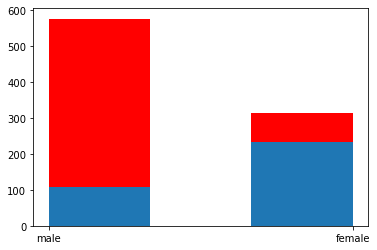

In [13]:
plt.hist(n_data.Sex, bins=n_data.Sex.unique().size*2 - 1, color="r")
plt.hist(sn_data.Sex, bins=n_data.Sex.unique().size + 1)
plt.show()

As can be seen from the plot, there were much more men on the board. (Red histogram)

What about survived passengers, the situation here is much different, as the 2/3 of all the survived passengers are women. We will use this fact later. (Blue histogram)

#### Pclass

Let's visualize Pclass column.

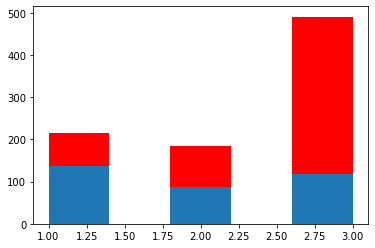

In [14]:
plt.hist(n_data.Pclass, bins=n_data.Pclass.unique().size*2 -1, color="r")
plt.hist(sn_data.Pclass, bins=sn_data.Pclass.unique().size*2 -1)
plt.show()

What can be seen from the plot, is that the biggest part of passengers are the 3rd class, which was the cheapest. The amount of 1st and 2nd class passengers is almost the same. (Red histogram)

Let's take a look at survived passengers. (Blue histogram)

Situation changes dramatically. As we can see, the highest amount of passengers are from the 1st. 

Moreover, survivors are:                                                                                                 almost 60% of 1st class passengers;
the half of the 2nd class passengers;
small part of 3ed class passengers.

That means, that 1rd class passengers were more likely to survive.

#### Age

Let's visualize Age column.

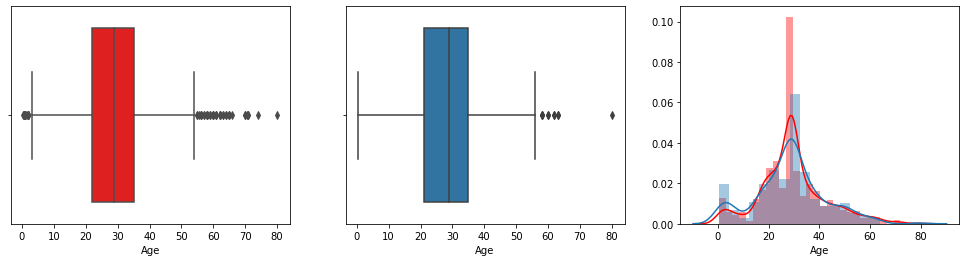

In [15]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.Age, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.Age)
plt.subplot(1, 3, 3)
sns.distplot(n_data.Age, color="r")
sns.distplot(sn_data.Age)
plt.show()

As we can see there are only several passengers, who are older than 70. (Red boxplot)

Only one person from the age 65-80 survived. (Blue boxplot)

What can be seen from the distplot, is that more children survived, than died. 20-40 year old adults were also more likely to survive. But for the people, who are older than 60, chances to survive were really small.
For other people there is no obvious age-related dependencies.

#### SibSp

Let's visualize SibSp column (number of siblings/spouses aboard the Titanic).

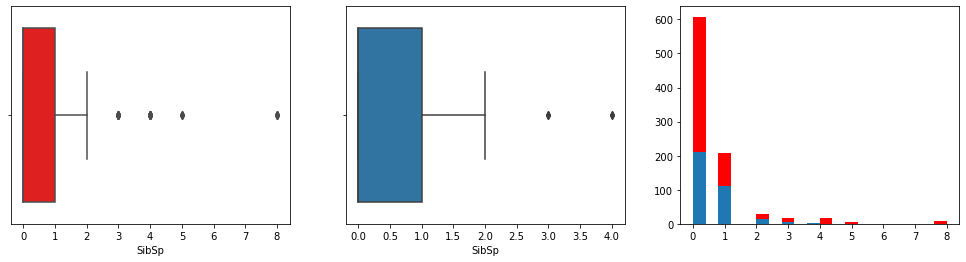

In [16]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.SibSp, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.SibSp)
plt.subplot(1, 3, 3)
plt.hist(n_data.SibSp, bins=20, color="r")
plt.hist(sn_data.SibSp, bins=10)
plt.show()

What can be seen from the boxplot, is that the amount of people with SibSp >= 3 is really small. (Red boxplot)

People with SibSp > 4 didn't survive at all. (Blue boxplot)

There are any obvious dependencies on histogram, so we will move on.

#### Parch

Let's visualize Parch column (number of parents / children aboard the Titanic).

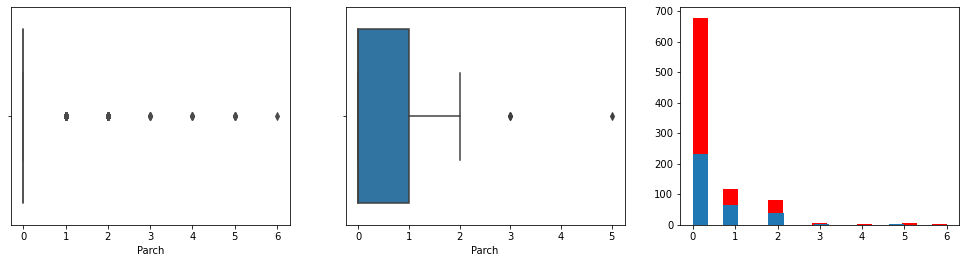

In [17]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(n_data.Parch, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(sn_data.Parch)
plt.subplot(1, 3, 3)
plt.hist(n_data.Parch, bins=17, color="r")
plt.hist(sn_data.Parch, bins=7*2)
plt.show()

We have got only several people with Parch > 0 (Red/first boxplot)

People with 4 and 6 Parch didn't survive at all. (Blue boxplot)

There are any obvious dependencies on histogram, so we will move on.

#### Fare

Let's visualize Fare column

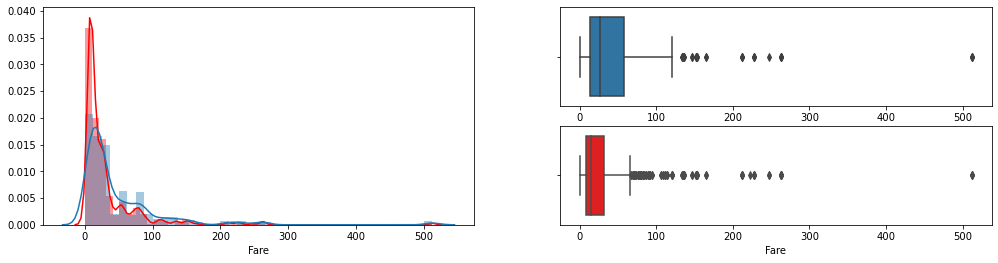

In [18]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 2, 1)
sns.distplot(n_data.Fare, color="r")
sns.distplot(sn_data.Fare)
plt.subplot(2, 2, 2)
sns.boxplot(sn_data.Fare)
plt.subplot(2, 2, 4)
sns.boxplot(n_data.Fare, color="r")
plt.show()

These plots don't really give us usefull information.

#### Embarked

Let's visualize Embarked - the last column.

<function matplotlib.pyplot.show(*args, **kw)>

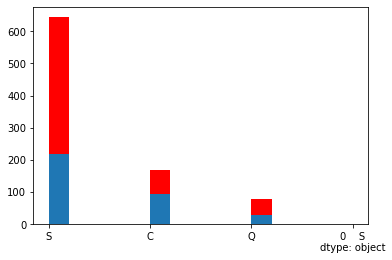

In [19]:
plt.hist(n_data.Embarked, bins=15, color="r")
plt.hist(sn_data.Embarked, bins=15)
plt.show

This plot don't really give us usefull information.

### Data encoding

Seems like all the data left is numeric and categorical. Let's check if it is true.

for col in n_data:
    print(col, n_data[col].dtypes)

To encode Sex and Embarked columns we will use OneHotEncoder.

In [21]:
n_data_d = pd.get_dummies(n_data)
n_test_d = pd.get_dummies(n_test)

Let's check out if it worked fine.

In [22]:
n_data_d

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0 S\ndtype: object,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,0,1
888,0,3,29.0,1,2,23.4500,1,0,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,0,1,0,0


In [23]:
n_test_d

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,29.0,0,0,8.0500,0,1,0,0,1


We have got only 3 embarked values : Q, S and C. Let's drop Embarked_0    S\ndtype: object column as it doesn't make any sense.

In [24]:
n_data_d = n_data_d.drop(columns=["Embarked_0    S\ndtype: object"])
n_data_d.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
n_test_d.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


### Correlation Matrix

Now, let's check if any features are correlating between each other.

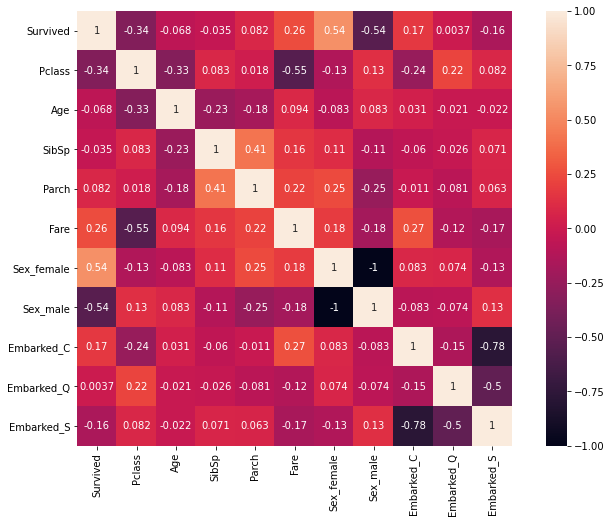

In [26]:
corr_m = n_data_d.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr_m, annot=True, square=True)
plt.show()

In [27]:
high_corr = corr_m.nlargest(12, 'Survived')['Survived'].drop(['Survived'])
high_corr

Sex_female    0.543351
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.067814
Embarked_S   -0.155660
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64

As we can see, Survive correlates mostly on Sex_female, Sex_male, Pclass and Fare.

### Distribution

Let's use log to make Age and Fare columns distribution more similar to normal.

In [28]:
n_data_d.Age = np.log1p(n_data_d.Age)
n_test_d.Age = np.log1p(n_test_d.Age)

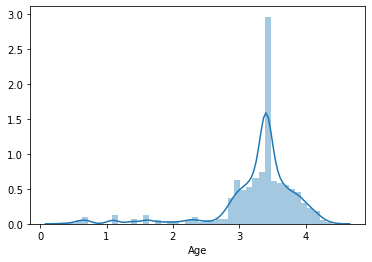

In [29]:
sns.distplot(n_data_d.Age)
plt.show()

In [30]:
n_data_d.Fare = np.log1p(n_data_d.Fare)
n_test_d.Fare = np.log1p(n_test_d.Fare)

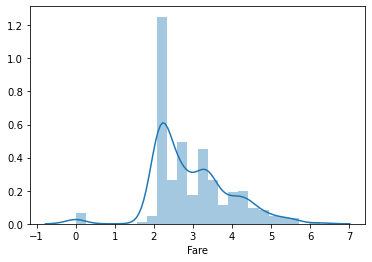

In [31]:
sns.distplot(n_data_d.Fare)
plt.show()

This operation can help us, because models can make better prediction, when data is normaly distributed.

# Model choosing and training

Import all models and functions

In [98]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve, make_scorer
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
import tensorflow as tf
from lightgbm import LGBMClassifier

First of all, as our task is to classify, we should check, if both Survived classes are balanced.

In [38]:
print("Survived = {} \nDead = {}".format(n_data_d[n_data_d.Survived == 1].shape[0], n_data_d[n_data_d.Survived == 0].shape[0]))

Survived = 342 
Dead = 549


Our classes aren't really well-balanced, so the accuracy metric won't show us the real prediction accuracy. That's why we will use AUC-ROC metrics.

### Splitting data

Now, before training our models, we should split data, to be able to find the best hyperparameters for our models.

In [54]:
n_data_d.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,3.135494,1,0,2.110213,0,1,0,0,1
1,1,1,3.663562,1,0,4.280593,1,0,1,0,0
2,1,3,3.295837,0,0,2.188856,1,0,0,0,1
3,1,1,3.583519,1,0,3.990834,1,0,0,0,1
4,0,3,3.583519,0,0,2.202765,0,1,0,0,1


In [91]:
#X is what we will use to predict, and y is what we should predict
X, y = n_data_d.drop(columns=["Survived"]), n_data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### RandomForestClssifier

We will use RandomForestClassifier. bootstrap is True, as the size of data isn't really big. We will use ROC-AUC metrics to score our models. The advantage of ROC-AUC is, that it doesn't depend on data's balance.

In [92]:
roc_auc = make_scorer(roc_auc_score, higher_is_better=True)

rf = RandomForestClassifier(bootstrap=True, n_estimators=700, criterion='entropy')
rf.fit(X_train, y_train)

print("Best score on train data: {:.4f}".format(roc_auc_score(rf.predict(X_train), y_train)))
print("Best score on test data: {}\n".format(roc_auc_score(rf.predict(X_test), y_test)))

Best score on train data: 0.9777
Best score on test data: 0.780429292929293



Let's also take a look at important features.

In [93]:
rf.feature_importances_

array([0.08743253, 0.26513983, 0.05531409, 0.03866519, 0.28202444,
       0.1200074 , 0.11488768, 0.01372826, 0.00864869, 0.01415189])

Seems like Fare, Age and Sex have the highest importance for our model.

### KNeighborsClassifier

We will use GridSearchCV to find the best parameters for KNeighborsClassifier.

In [94]:
params={'n_neighbors' : range(1, 20), 'leaf_size' : range(1, 50)}

knn_grid = GridSearchCV(KNeighborsClassifier(), params, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

print("Best score on train data: {:.4f}".format(knn_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(knn_grid.predict(X_test), y_test)))

Best score on train data: 0.8506
Best score on test data: 0.8346575342465753



Seems like the scores are actually better than RandomForestClassifier's

### RidgeClassifier

We will use GridSearchCV to find the best parameters for Ridge.

In [99]:
params = {'alpha' : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'normalize' : [True, False], 'random_state' : [0, 50, 100, 150, 200]}

r_grid = GridSearchCV(RidgeClassifier(), params, scoring='roc_auc')
r_grid.fit(X_train, y_train)
print("Best score on train data: {:.4f}".format(r_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(r_grid.predict(X_test), y_test)))

Best score on train data: 0.8507
Best score on test data: 0.7858908780903665



In [103]:
r_grid.best_estimator_.coef_

array([[-0.19698633, -0.19203516, -0.09189779, -0.03958019,  0.12839878,
         0.37626996, -0.37626996,  0.05079693,  0.01352928, -0.07058871]])

All the same important features from RandomForestClassifier, but it also has Pclass

### LogisticRegression

We will use GridSearchCV to find the best parameters for LogisticRegression.

In [104]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

log_reg_grid = GridSearchCV(LogisticRegression(), params, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)
print("Best score on train data: {:.4f}".format(log_reg_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(log_reg_grid.predict(X_test), y_test)))

Best score on train data: 0.8504
Best score on test data: 0.8005738266529633



As we can see LogisticRegression makes better results, than RandomForest and RidgeClassifier, but it is still worse than KNeighbors.

### Neural Network

The last model will be neural network. We will use keras to build it.

In [113]:
nn = Sequential()

nn.add(Dense(10, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Dense(16, kernel_initializer=keras.initializers.he_normal, activation='elu'))
nn.add(Dropout(0.3))
nn.add(Dense(32, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Dropout(0.3))
nn.add(Dense(4, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Flatten())
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.metrics.AUC(curve='ROC'))
nn.fit(X_train, y_train, epochs=500, verbose=0)
scores = nn.evaluate(X_train, y_train, verbose=0)
print("\nAccuracy on train data : {}".format(scores[1]))
scores = nn.evaluate(X_test, y_test, verbose=0)
nn_pred = np.where(nn.predict(X_test) > 0.5, 1, 0)
print("Accuracy on test data : {}".format(roc_auc_score(nn_pred, y_test)))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


Accuracy on train data : 0.8854658603668213
Accuracy on test data : 0.8015914201695209


Looks like neural networks' scores are pretty fine, but still worse then KNeighborsClassifier's

### Result

As can be seen from the results, the most important features are : Pclass, Age, Sex and Fare.


The best acuracy is given by KNeighborsClassifier. 